# Regressão 01 - tarefa 02 - transformações em X e Y

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.formula.api as smf

In [2]:
# Carregando base de dados
tips = sns.load_dataset('tips')
tips['tip_pct'] = tips['tip'] / tips['total_bill'] 
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808,20.98


<Axes: xlabel='tip'>

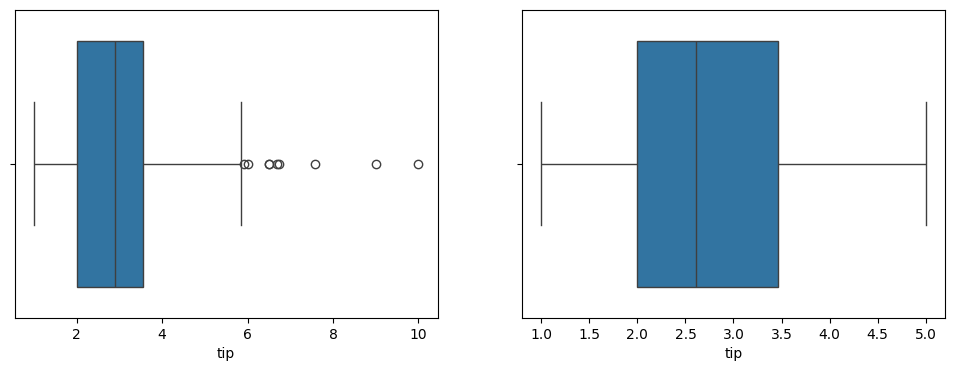

In [3]:
# Visualizando outliers
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
sns.boxplot(data=tips, x='tip', ax=ax[0])

# Removendo outliers
tips['tip'] = [tip if tip <= 5 else np.nan for tip in tips['tip']]

# Visualizando resultado
sns.boxplot(data=tips, x='tip', ax=ax[1])

In [5]:
# Recriando modelo do exercício anterior
reg1 = smf.ols('tip ~ tip_pct * net_bill', data=tips).fit()
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 1.832e+04
Date:                Tue, 18 Jun 2024   Prob (F-statistic):          1.48e-265
Time:                        20:20:40   Log-Likelihood:                 303.42
No. Observations:                 226   AIC:                            -598.8
Df Residuals:                     222   BIC:                            -585.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.4634      0.029    -15.730      0.000      -0.521      -0.405
tip_pct              3.1512      0.172     18.339      0.000       2.813       3.490
net_bill            -0.0019      0.001     -1.339      0.182      -0.005       0.001
tip_pct:net_bill     1.1942      0.011    106.773      0.000       1.172       1.216
==============================================================================
Omnibus:                       78.046   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1068.795
Skew:                           0.899   Prob(JB):                    8.20e-233
Kurtosis:                      13.501   Cond. No.                         735.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

In [6]:
# Criando modelo ajustado
reg2 = smf.ols('tip ~ tip_pct * np.log(net_bill)', data=tips).fit()
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     1285.
Date:                Tue, 18 Jun 2024   Prob (F-statistic):          5.74e-140
Time:                        20:21:18   Log-Likelihood:                 8.9997
No. Observations:                 226   AIC:                            -9.999
Df Residuals:                     222   BIC:                             3.683
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -5.1924      0.242    -21.429      0.000      -5.670      -4.715
tip_pct                      7.6428      1.242      6.152      0.000       5.195      10.091
np.log(net_bill)             1.7884      0.083     21.627      0.000       1.625       1.951
tip_pct:np.log(net_bill)     4.8193      0.472     10.204      0.000       3.889       5.750
==============================================================================
Omnibus:                       96.383   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              386.188
Skew:                           1.726   Prob(JB):                     1.38e-84
Kurtosis:                       8.394   Cond. No.                         251.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

In [7]:
# Criando modelo ajustado
reg3 = smf.ols('tip ~ tip_pct * np.power(net_bill, 2)', data=tips).fit()
reg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     757.7
Date:                Tue, 18 Jun 2024   Prob (F-statistic):          2.68e-116
Time:                        20:21:33   Log-Likelihood:                -46.501
No. Observations:                 226   AIC:                             101.0
Df Residuals:                     222   BIC:                             114.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         0.3856      0.093      4.128      0.000       0.202       0.570
tip_pct                           7.2357      0.542     13.342      0.000       6.167       8.304
np.power(net_bill, 2)            -0.0021      0.000    -11.514      0.000      -0.002      -0.002
tip_pct:np.power(net_bill, 2)     0.0460      0.002     28.068      0.000       0.043       0.049
==============================================================================
Omnibus:                       92.476   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              535.734
Skew:                          -1.488   Prob(JB):                    4.64e-117
Kurtosis:                       9.931   Cond. No.                     1.25e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

In [8]:
# Criando modelo ajustado
reg4 = smf.ols('tip ~ np.log(tip_pct) * net_bill', data=tips).fit()
print(reg4.summary())
print(f'R2 igual a {reg4.rsquared*100:.2f}%')

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     1151.
Date:                Tue, 18 Jun 2024   Prob (F-statistic):          5.58e-135
Time:                        20:21:57   Log-Likelihood:                -2.6961
No. Observations:                 226   AIC:                             13.39
Df Residuals:                     222   BIC:                             27.07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

In [9]:
# Criando modelo ajustado
reg5 = smf.ols('tip ~ np.log(tip_pct) * np.log(net_bill)', data=tips).fit()
print(reg5.summary())
print(f'R2 igual a {reg5.rsquared*100:.2f}%')

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     1426.
Date:                Tue, 18 Jun 2024   Prob (F-statistic):          1.02e-144
Time:                        20:23:00   Log-Likelihood:                 20.140
No. Observations:                 226   AIC:                            -32.28
Df Residuals:                     222   BIC:                            -18.60
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

###  6. qual modelo resultou no melhor ajuste?

In [10]:
# Comparando ajustes de modelos
for i, reg in enumerate([reg2, reg3, reg4, reg5]):
    if i == 0:
        temp = reg.rsquared
    if reg.rsquared < temp:
        temp = reg.rsquared
    if i == 3:
        print('O modelo com o melhor ajuste foi o modelo com parâmetros {} com {:.2f}%'.format(
            [param for param in reg.params.index[1:]]
            ,temp*100))
    

O modelo com o melhor ajuste foi o modelo com parâmetros ['np.log(tip_pct)', 'np.log(net_bill)', 'np.log(tip_pct):np.log(net_bill)'] com 91.10%


### Explicação
Como o $R^2$ inicial já é consideravelmente alto, existem altas chances do modelo estar **overfitado** por isso eu considerei como melhor ajuste o modelo que reduziu o $R^2$ e não aumentou, nesse caso foi o 3º modelo criado que apresentou a melhor redução. Mas devo enfatizar que isso é uma análise feita sob a perspectiva única de avaliar o modelo através do coeficiente de determinação, numa aplicação real seria necessário construir gráficos tridimensionais para avaliar as regressões do modelo, assim como comparar outros parâmetros para verificar de forma mais incisiva qual modelo apresentou o melhor ajuste.